# Pytorch WorkFlow

#### What we are Covering

1. Data Prepare and Load
2. Build model
3. Fitting the model to data (Training)
4. Making Predictions and evaluating a model (inference)
5. Save and Reload a model
6. Putting it all together


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data Prepare and Load

Data can be anything in MAchine LEarning

1.   excel SPreadsheet
2.   Images of any kind
3.   Videos (YouTube has lots of data ...)
4. Audio like songs or podcasts
5. DNA
6. Texts

MAchine LEarning is a game of two parts
1. Get Data in to a numerical representations
2. Build a model to learn patters in that numerical representation,

To showcase this lets create some *Known* data using the linear regression formula.

We will use a linear regression formula to make straight line with *Known* Parameters

In [2]:
num = torch.randn(size = (2,2,2))
print(num.shape)
num2= num.unsqueeze(dim = 1)
print(num2.shape)

torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 2])


In [3]:
# revision
tensor = torch.rand(1)
print(tensor)
tensor2 = torch.randn(1)
print(tensor2)
print(tensor2.dtype)

range_tensor = torch.arange(0,11,2)
print(range_tensor)
print(range_tensor.dtype)
for i in range(len(range_tensor)):
  print(range_tensor[i])


chnged = range_tensor.type(torch.float32)
print(chnged.dtype)


tensor([0.7579])
tensor([-1.5332])
torch.float32
tensor([ 0,  2,  4,  6,  8, 10])
torch.int64
tensor(0)
tensor(2)
tensor(4)
tensor(6)
tensor(8)
tensor(10)
torch.float32


In [4]:
1 # Create Known Parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
steps = 0.02

X = torch.arange(start, end, steps)
X_rs= torch.reshape(X, shape = (len(X), 1))
print(X_rs)
print(X_rs.shape)
Y = weight*X_rs + bias
# Adding  some noise
#noise =  torch.randn_like(Y_) *.1
#Y= Y_ + noise
#print(Y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
torch.Size([50, 1])


In [5]:
len(X), len(Y)

(50, 50)

### Spliting Data in Training and Split

In [6]:
# xreate a train test split

train_split =int(0.8*len(X)) # used as an index
print(train_split)
x_train, y_train = X_rs[:train_split], Y[:train_split]  # First 80% for training
x_test, y_test = X_rs[train_split:], Y[train_split:]    # Last 20% for testing

print("Train size:", len(x_train), len(y_train))
print("Test size:", len(x_test), len(y_test))

40
Train size: 40 40
Test size: 10 10


#### Building a function to visualize the data
Visualzie, visualize


In [7]:
def plot_prediction(train_data = x_train,
                    train_label = y_train,
                    test_data = x_test,
                    test_label = y_test,
                    prediction = None):
  plt.figure(figsize = (10,7))
  #Plot Training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label = 'Training Data')
  # plot tets data in green
  plt.scatter(test_data, test_label, c = 'g', s= 4, label = 'Test_data')
  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s= 4, label = 'Prediction')

  plt.legend()

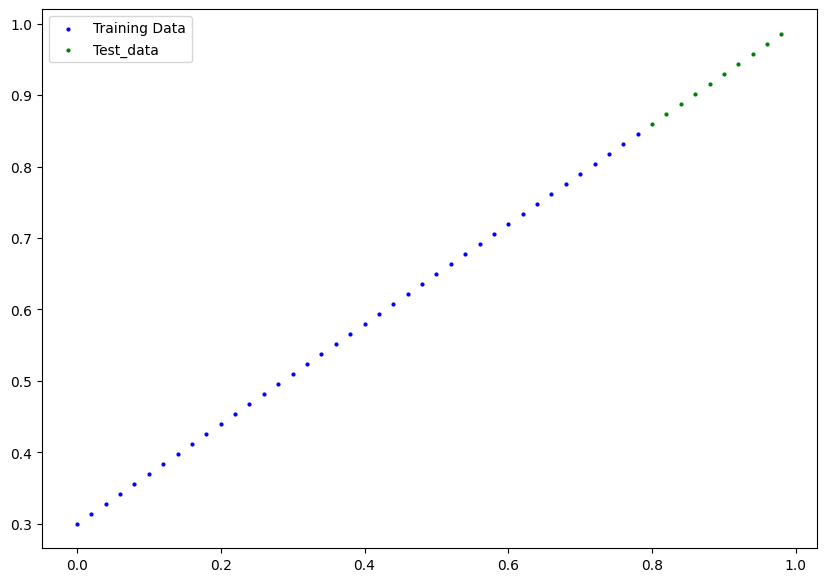

In [8]:
plot_prediction()

#### Building our first PyTorch Model

In [9]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
  #Define weights and bias as learnable parameters(Model Parameters)
    self.weights =nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

# forward
  def forward(self,x ):
    return self.weights * x + self.bias

There are two main algorithms to make the parametrs adjust or lrarning:
1. Gradient Descet
2. Back Propagation

### Pytorch Model Building Esentials:
* torch.nn - Cntains all of the buidings for computational graph(Neural Network)
* nn.Parameters - what parameters should our model try and learn, often a PyTorch LAyer from torch.nn will set these for us.
* torch.nnn.Module - the base class for all NN modules
* torch.optim - this where Optimizers live and have gradient descent
* def forward () - All nn.Module subclasses require you to overwrite forward(), this method define what happens in the forward computation.

In [10]:
# random seed : these random values are now deterministic.
torch.manual_seed(42)
# Model Parameters (instance of the model)
model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
# Returns a dictionary containing all the parameters
#and their associated names as key-value pairs.
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [11]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

link: https://www.learnpytorch.io/01_pytorch_workflow/

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


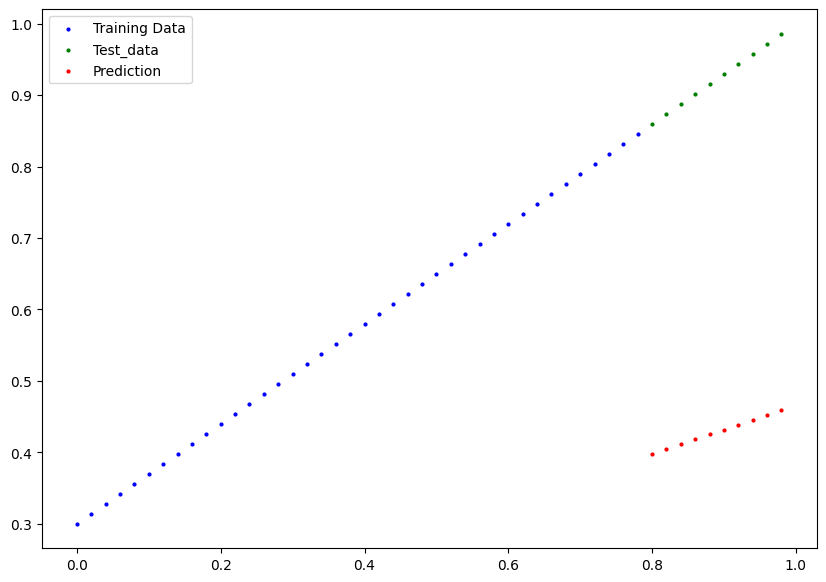

In [12]:
with torch.inference_mode(): #
  y_preds = model_0(x_test)
  print(y_preds)
  plot_prediction(prediction = y_preds)


### Training Our model:
Moving model from unknown parameters to known parameters
1. HOw wrong the momedl prediction are we will use LOSS FUNCTIONS
2. Optimizer: adjust the weights and biases od = fthe model

NOTE: Loss function may be called as cost function

For PyTorch we need
* A Training Loop
* A Testing Loop



In [13]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# Set up LOSS Function(MAE)
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.01)

#### Training Loop and Testing Loop Building
1. Loop through the data
2. forward Pass(Data moving through our model "forwad")
3. Calculate the Loss(Compareb forwars predictions to ground truth labels)
4. Optimizer Zero Grad
5. Loss Backward- move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss(**BackPropagation**)
6. Optimizer step- Use the optimizer to adjust our models's parameters to try and improve the loss(**Gradient Descent**)


In [15]:
# An Epoch is One loop through the Data
epochs = 200

# 1. Loop through the data
epoch_count = []
loss_value = []
test_loss_value = []

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # Turn on grad

  # 2. Forward Pass
  y_preds = model_0(x_train)

  # 3. Calculate the loss

  loss = Loss(y_preds, y_train)

  # 4. Optimizer zer grad
  optimizer.zero_grad()

  # 5. Perform Backpropagation
  loss.backward()

  # 6. Step the optimizer

  optimizer.step()


#### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = Loss(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    print(f'Weight: {model_0.weights.item()}   Bias: {model_0.bias.item()}')


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Weight: 0.34059035778045654   Bias: 0.1388094127178192
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Weight: 0.3795902729034424   Bias: 0.2388094663619995
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Weight: 0.4184202253818512   Bias: 0.3333094120025635
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Weight: 0.45118021965026855   Bias: 0.37680941820144653
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Weight: 0.4748101830482483   Bias: 0.38680940866470337
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Weight: 0.4938102066516876   Bias: 0.38430944085121155
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Weight: 0.5116001963615417   Bias: 0.37880951166152954
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Weight: 0.5287602543830872   Bias: 0.37180960178375

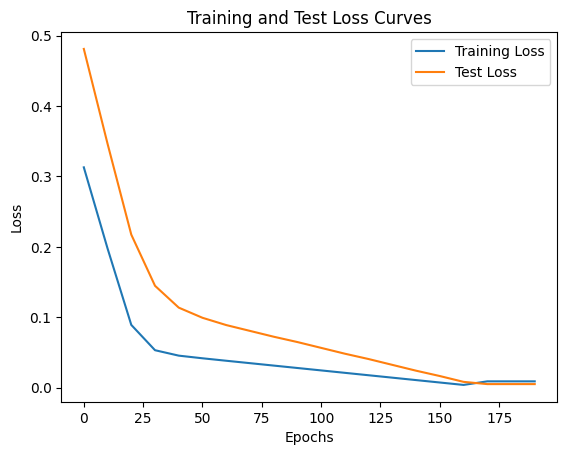

In [16]:
# Plotting Loss Curve
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label = 'Training Loss')
plt.plot(epoch_count, test_loss_value, label = 'Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

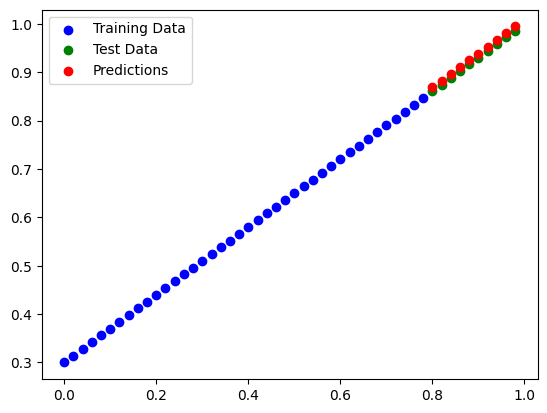

In [17]:
plt.scatter(x_train, y_train, c='b', label='Training Data')
plt.scatter(x_test, y_test, c='g', label='Test Data')
plt.scatter(x_test, test_pred, c='r', label='Predictions')
plt.legend()
plt.show()

#### SAving a Model


Ther are three main methods for saving and loading model
1. `torch.save()` -  allows you to save a PyTorcg object in python pickle format
2. `torch.load()` - allows you to load PyTorch Object
3. `torch.nn.Module.load_state_dict()` - that allows to load model's saved state dictionary


In [19]:
# Savibg Model
from pathlib import Path

# 1. Create model directory

MODEL_PATH =Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model Save PAth
MODEL_NAME = 'linear_regression_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. sAVE THE MODEL state dict
print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: models/linear_regression_model.pth


#### Loading a Pytorch model

we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the entire model, we first have to load the `state_dict()` with torch.`load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of nn.Module).

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-21-f8c095e93af7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [22]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

# Summary

### Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creating Device Agnostic code:
for both the GPU and CPU

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Data
Creating data using Linear Regression

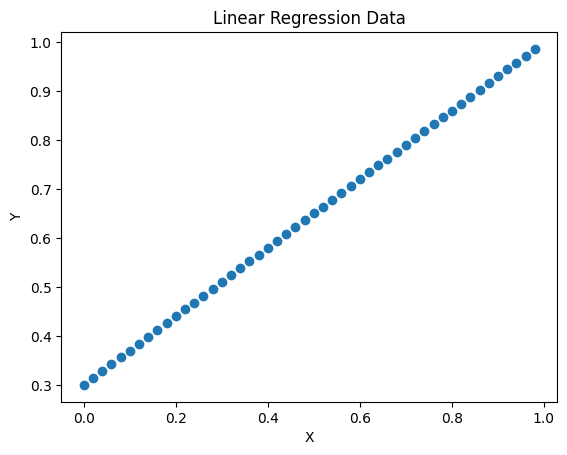

In [3]:
Weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
Y = Weight * X + bias

plt.scatter(X, Y)
plt.title('Linear Regression Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
# SPlitting of the data using train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

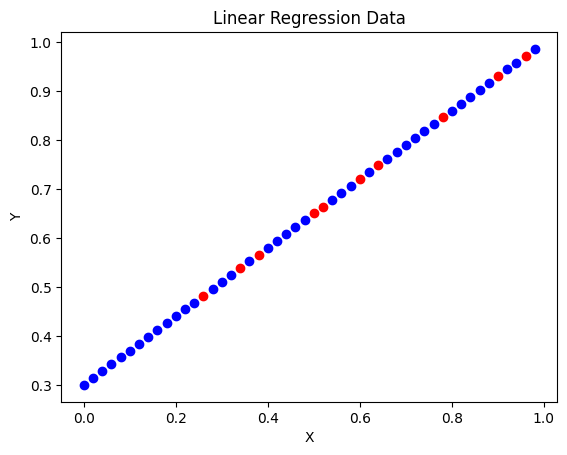

In [5]:
# Lets do the plotting of the data
plt.scatter(X_train, Y_train, c = 'b', label = 'Training Data')
plt.scatter(X_test, Y_test, c = 'r', label = 'Test Data')
plt.title('Linear Regression Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Building Model PyTorch Linear Model

In [6]:
## Deining our model
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

# Set the manual seed

torch.manual_seed(42)

model = LinearModel()
model,model.state_dict()

(LinearModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
# set the model to use the taregtee  device
next(model.parameters()).device
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

#### Training
1. Loop
2. Prediction
3. Loss
4. Optimizer.zero_grad
5. loss.backward
6. optimizer.step()

In [9]:
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [12]:
epochs = 200


######### Puting data on the device

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):

  model.train()
  # Forward Pass
  y_preds = model(X_train)
  # Calculate the Loss
  loss = Loss(y_preds, Y_train)
  # Zero the Grads
  optimizer.zero_grad()
  # BackPropagation
  loss.backward()
  # Optimizer step
  optimizer.step()


  #### Testing

  model.eval()
  with torch.inference_mode():

    test_preds = model(X_test)
    test_loss = Loss(test_preds, Y_test)

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.5600506067276001 | Test Loss: 0.5552194714546204
Epoch: 10 | Loss: 0.4383816719055176 | Test Loss: 0.42784810066223145
Epoch: 20 | Loss: 0.31671270728111267 | Test Loss: 0.3004767894744873
Epoch: 30 | Loss: 0.19504375755786896 | Test Loss: 0.17310546338558197
Epoch: 40 | Loss: 0.07337480038404465 | Test Loss: 0.04598527029156685
Epoch: 50 | Loss: 0.0360596664249897 | Test Loss: 0.02414798177778721
Epoch: 60 | Loss: 0.029995162039995193 | Test Loss: 0.020626742392778397
Epoch: 70 | Loss: 0.024409998208284378 | Test Loss: 0.016695691272616386
Epoch: 80 | Loss: 0.018832743167877197 | Test Loss: 0.012815380468964577
Epoch: 90 | Loss: 0.013247578404843807 | Test Loss: 0.008884317241609097
Epoch: 100 | Loss: 0.007668554317206144 | Test Loss: 0.005004018545150757
Epoch: 110 | Loss: 0.0020851590670645237 | Test Loss: 0.0010729640489444137
Epoch: 120 | Loss: 0.01075982116162777 | Test Loss: 0.00164805946405977
Epoch: 130 | Loss: 0.01075982116162777 | Test Loss: 0.001648059464

In [13]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7027]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3095], device='cuda:0'))])

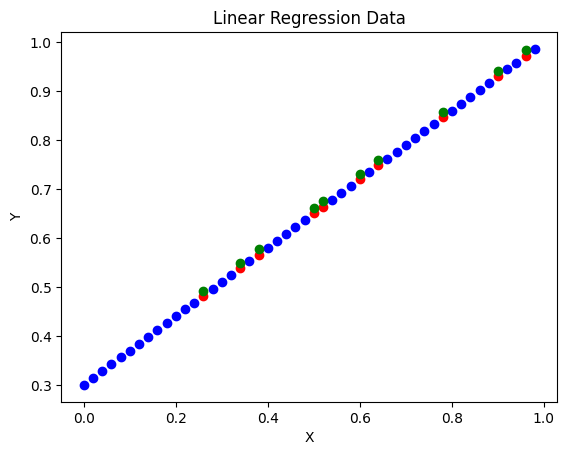

In [16]:
# Predictions

X_train = X_train.cpu()
Y_train = Y_train.cpu()
X_test = X_test.cpu()
Y_test = Y_test.cpu()
test_preds = test_preds.cpu()
plt.scatter(X_train, Y_train, c = 'b', label = 'Training Data')
plt.scatter(X_test, Y_test, c = 'r', label = 'Test Data')
plt.scatter(X_test, test_preds, c = 'g', label = 'Predictions')
plt.title('Linear Regression Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Saving and Loading trainnde momdelm

In [17]:
from pathlib import Path

# 1. Create model directory

MODEL_PATH =Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model Save PAth
MODEL_NAME = 'linear_regression_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj = model.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: models/linear_regression_model.pth


##3 Loading the model
Loaded

In [18]:
LoadModel = LinearModel()
LoadModel.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-18-29fc3be51c6a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  LoadModel.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [19]:
LoadModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7027]])),
             ('linear_layer.bias', tensor([0.3095]))])

# Excercise

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Data

torch.Size([100, 1])
torch.Size([100, 1])


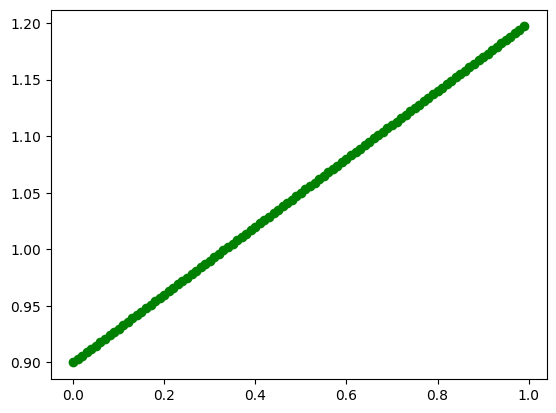

In [27]:
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
print(X.shape)

Y = weight*X + bias
print(Y.shape)

plt.scatter(X,Y, c='g')
plt.show()





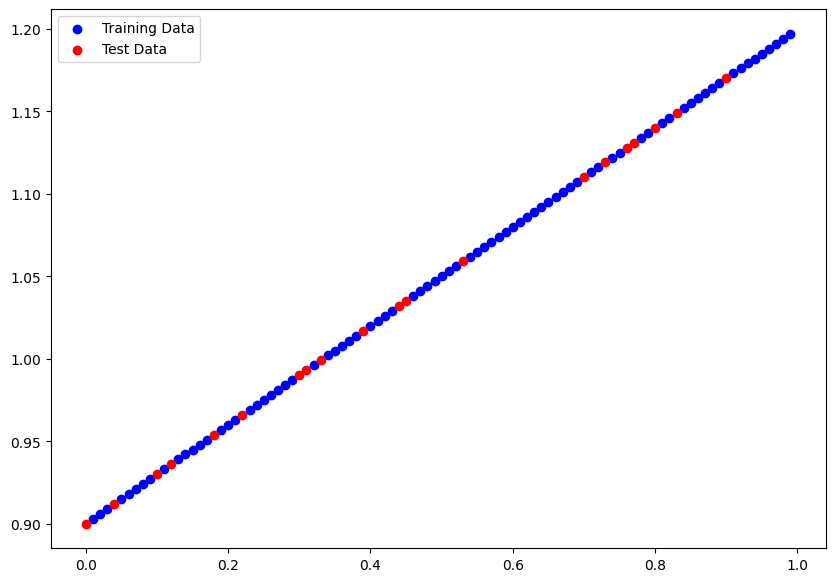

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='r', label='Test Data')
plt.legend()
plt.show()

## Model Building

In [29]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.Linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    return self.Linear_layer(x)


In [30]:
torch.manual_seed(42)

model = LinearModel()
model.state_dict()


OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
             ('Linear_layer.bias', tensor([0.8300]))])

In [31]:
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

Epoch: 0 | Loss: 0.17584219574928284 | Test Loss: 0.14641842246055603
Epoch: 20 | Loss: 0.09846626222133636 | Test Loss: 0.09271396696567535
Epoch: 40 | Loss: 0.08037561923265457 | Test Loss: 0.08509032428264618
Epoch: 60 | Loss: 0.07040844112634659 | Test Loss: 0.07633213698863983
Epoch: 80 | Loss: 0.06090237945318222 | Test Loss: 0.06624199450016022
Epoch: 100 | Loss: 0.05141105502843857 | Test Loss: 0.055850934237241745
Epoch: 120 | Loss: 0.041918881237506866 | Test Loss: 0.045459844172000885
Epoch: 140 | Loss: 0.03242770582437515 | Test Loss: 0.03500856086611748
Epoch: 160 | Loss: 0.022937152534723282 | Test Loss: 0.024617478251457214
Epoch: 180 | Loss: 0.013444979675114155 | Test Loss: 0.014226386323571205
Epoch: 200 | Loss: 0.00396070908755064 | Test Loss: 0.003896757960319519
Epoch: 220 | Loss: 0.008502768352627754 | Test Loss: 0.004401552490890026
Epoch: 240 | Loss: 0.008502768352627754 | Test Loss: 0.004401552490890026
Epoch: 260 | Loss: 0.008502768352627754 | Test Loss: 0.004

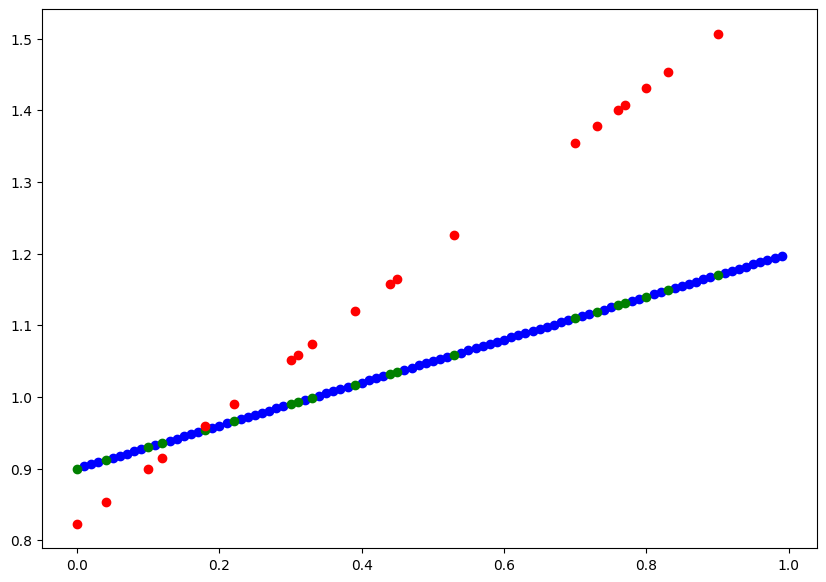

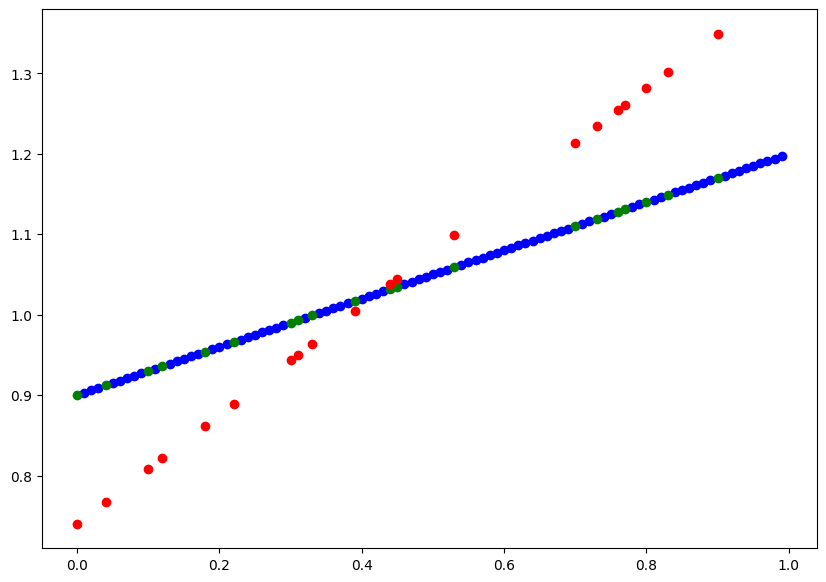

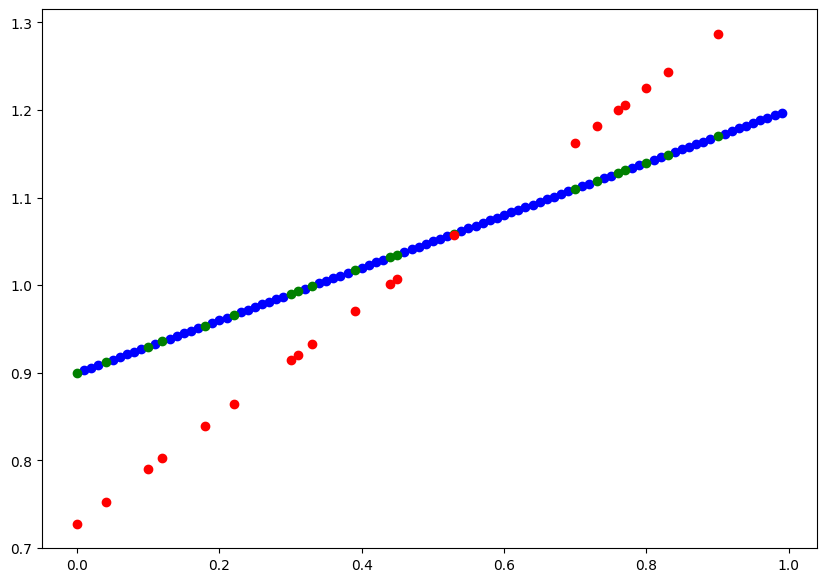

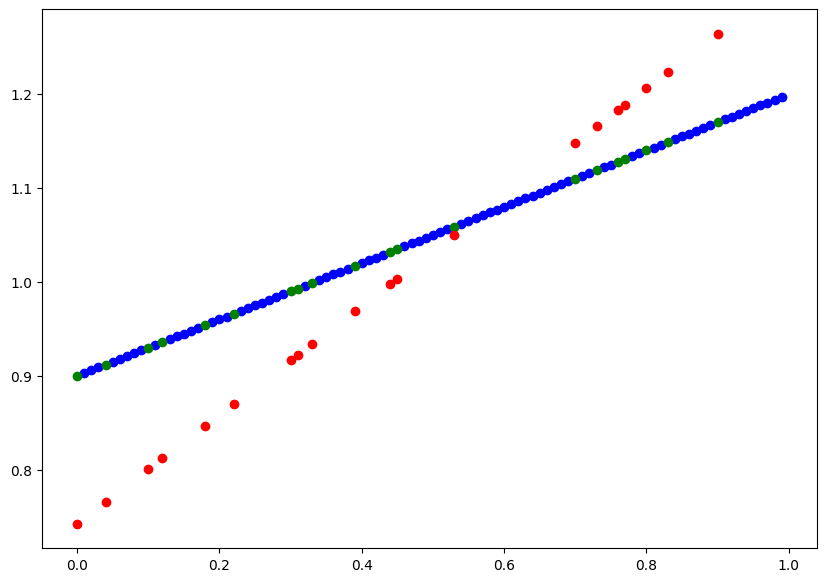

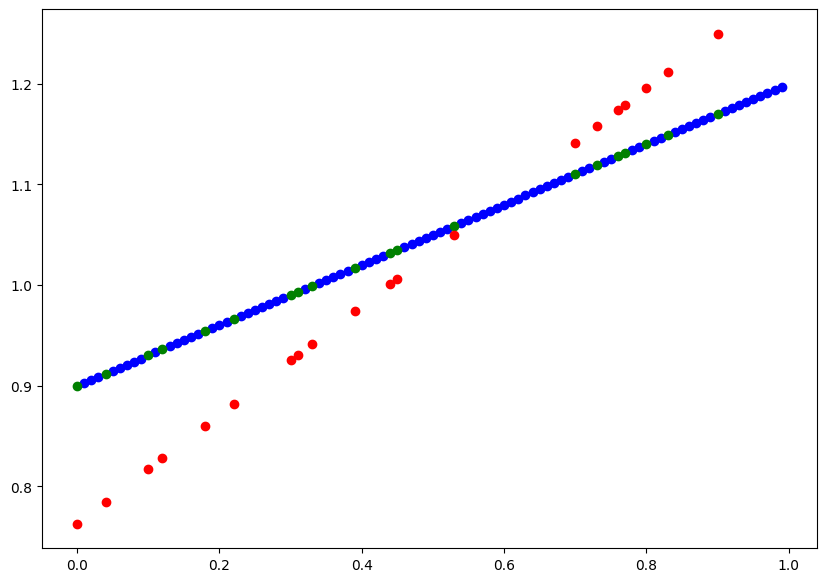

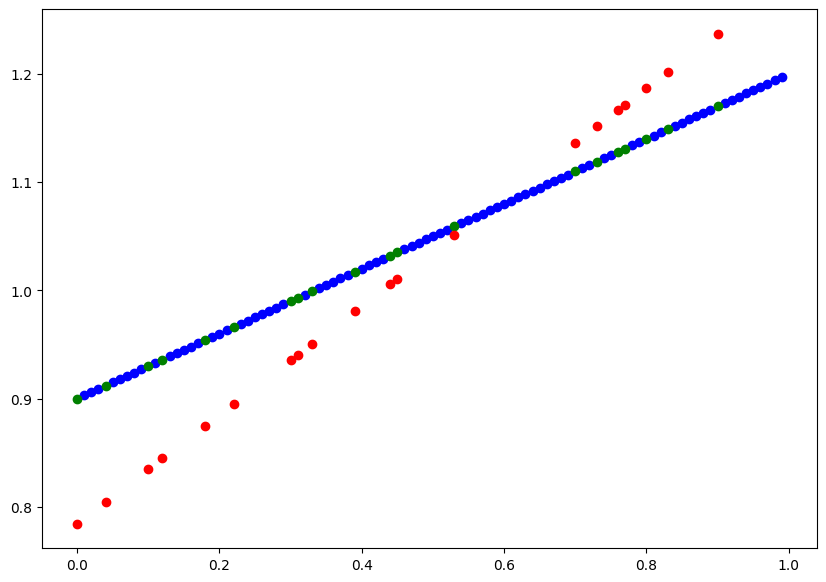

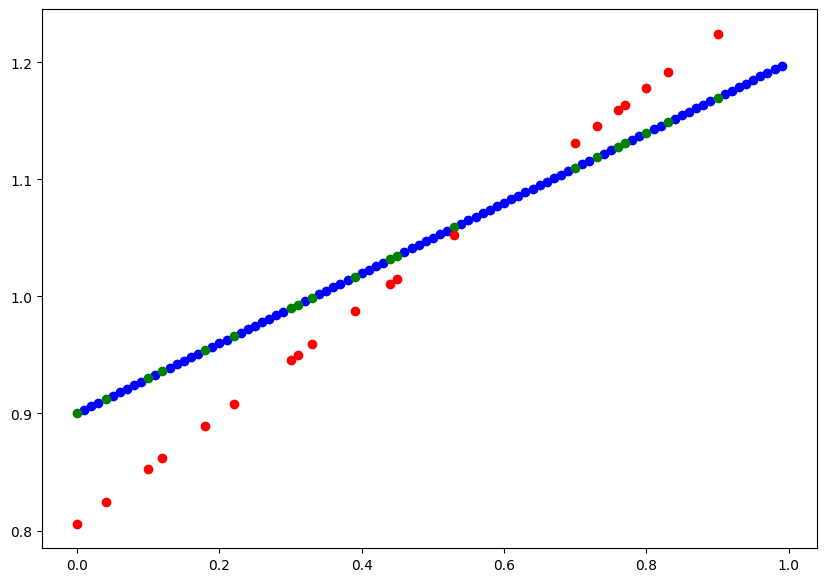

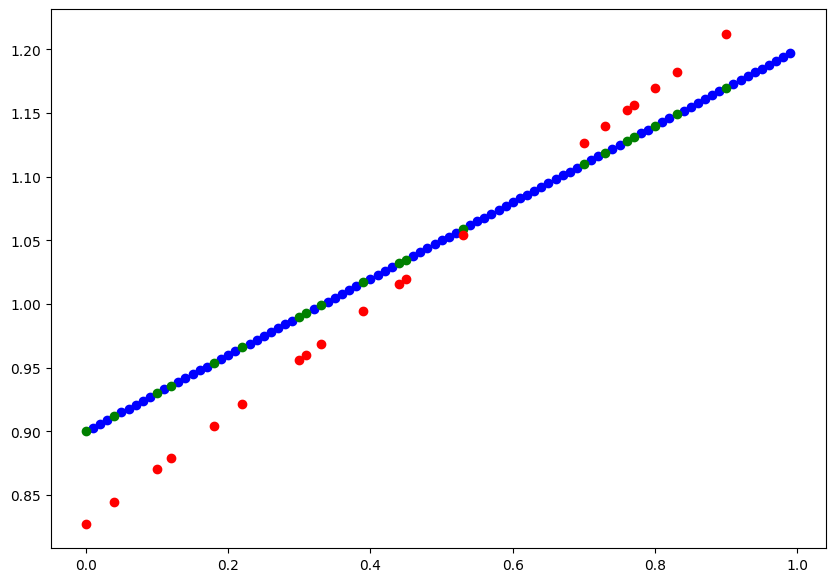

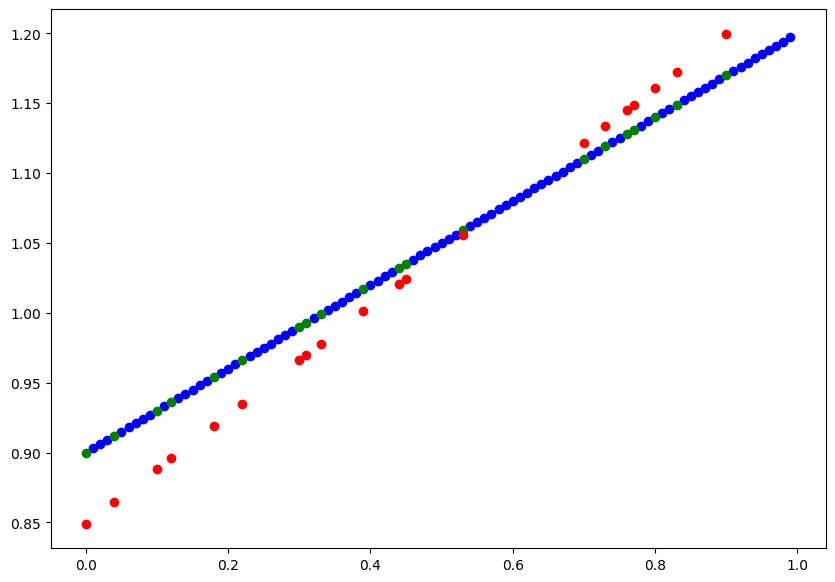

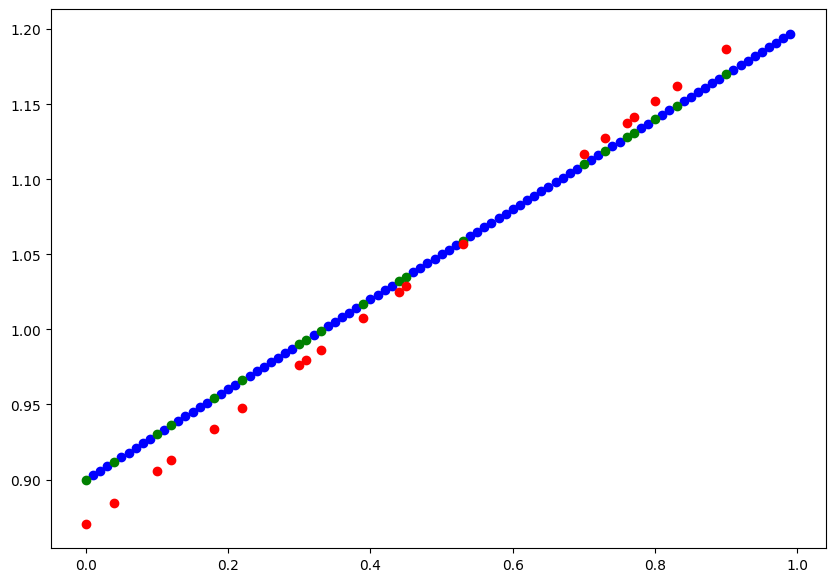

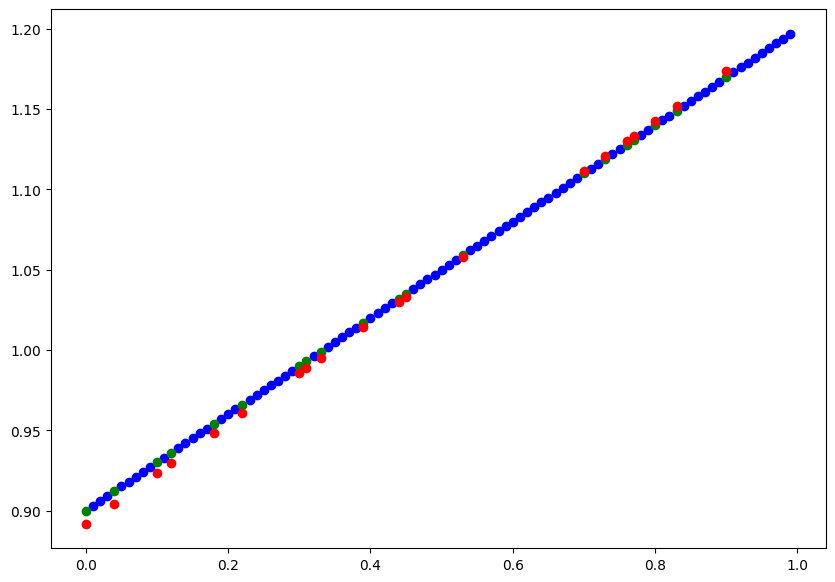

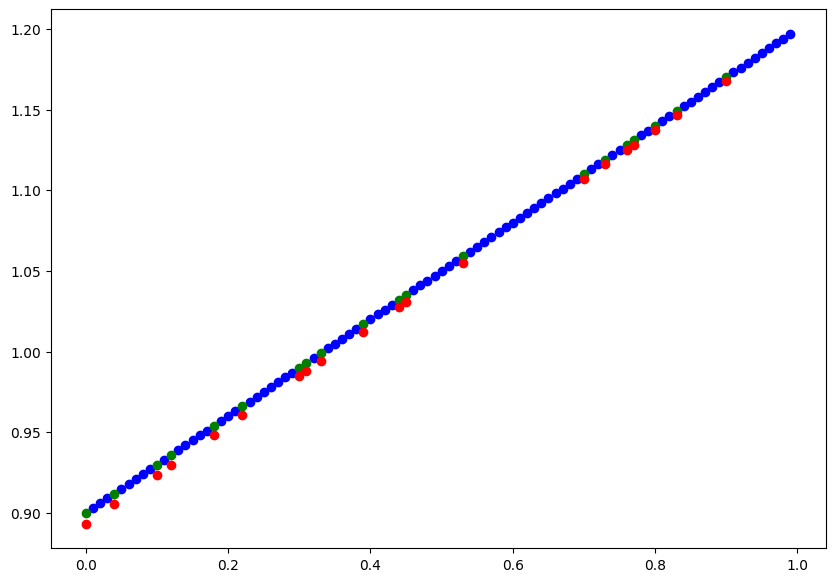

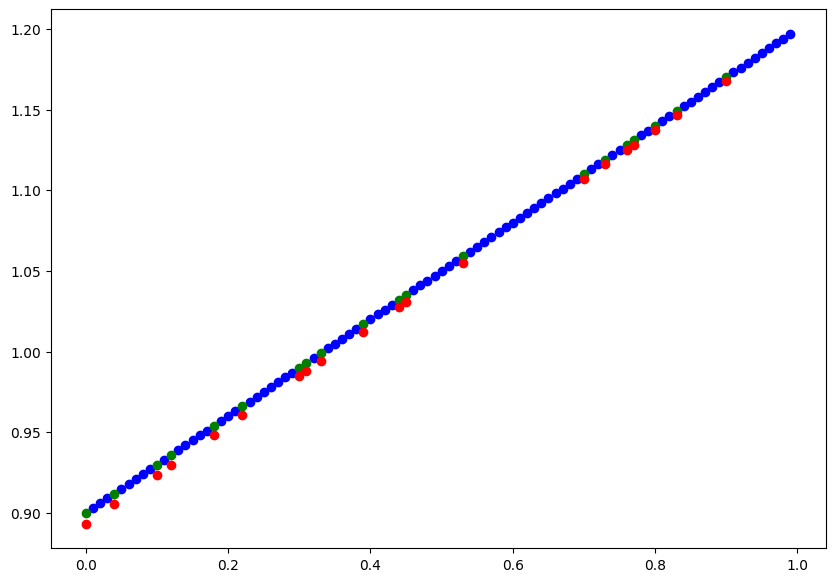

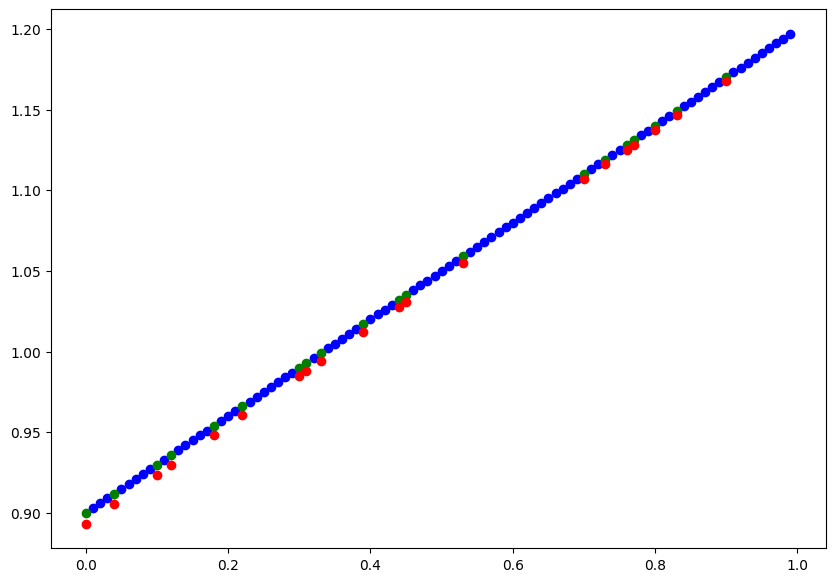

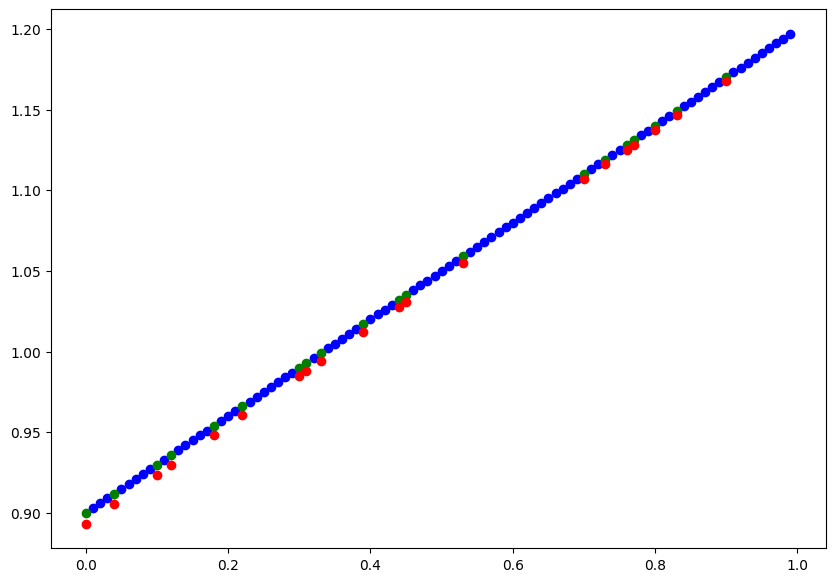

In [32]:
epochs = 300

for epoch in range(epochs):
  model.train()

  y_preds = model(X_train)

  loss = Loss(y_preds, Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  model.eval()
  if epoch % 20 == 0:
    with torch.inference_mode():
      test_preds = model(X_test)
      test_loss = Loss(test_preds, Y_test)
      print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
      plt.figure(figsize=(10,7))
      plt.scatter(X_train, Y_train, c='b', label='Training Data')
      plt.scatter(X_test, Y_test, c='g', label='Test Data')
      plt.scatter(X_test, test_preds, c='r', label='Predictions')

In [23]:
model.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.3103]])),
             ('Linear_layer.bias', tensor([0.9033]))])

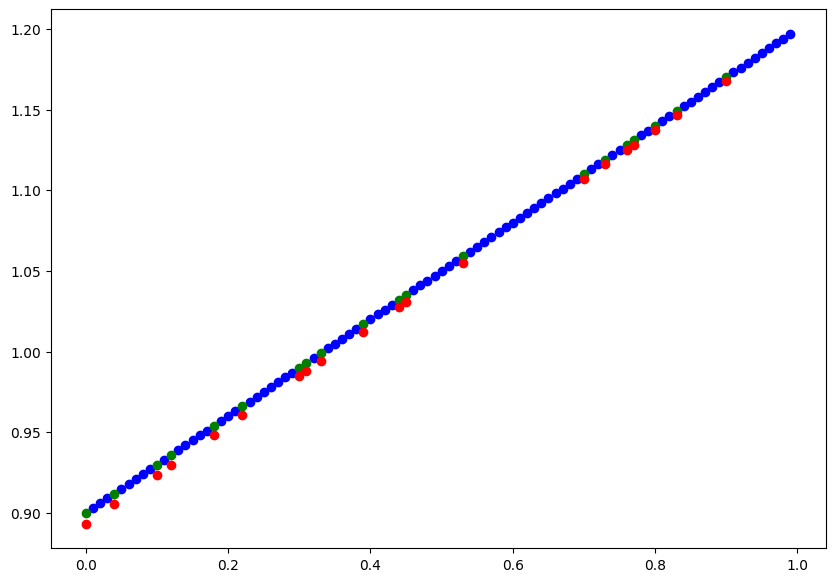

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='g', label='Test Data')
plt.scatter(X_test, test_preds, c='r', label='Predictions')

## Saving Model

In [33]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'Final_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj = model.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: models/Final_model.pth
